In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [8]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region',
       'insurance_claim', 'claim_amount'],
      dtype='object')


In [3]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path, index_col=0)

# Calculate the total number of individuals
total_individuals = len(df)

# Filter the dataset for individuals with BMI greater than 25
overweight_or_obese = df[df['bmi'] > 25]

# Calculate the number of overweight or obese individuals
num_overweight_or_obese = len(overweight_or_obese)

# Calculate the proportion
proportion = num_overweight_or_obese / total_individuals
proportion_percentage = proportion * 100

print(f"Proportion of individuals classified as overweight or obese: {proportion_percentage:.2f}%")


Proportion of individuals classified as overweight or obese: 81.54%


In [4]:
mean_children = df['children'].mean()
variance_children = df['children'].var()
print(f"Mean: {mean_children}, Variance: {variance_children}")


Mean: 1.0949177877429, Variance: 1.453212745666905


In [10]:
import pandas as pd
import scipy.stats as stats

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Compute mean and standard deviation of age
mean_age = df['age'].mean()
std_age = df['age'].std()

# Calculate the z-score for age 60
z_score = (60 - mean_age) / std_age

# Compute the cumulative probability for age 60 or older
probability_60_or_older = 1 - stats.norm.cdf(z_score)

# Calculate the expected number of individuals aged 60 or older
total_individuals = len(df)
expected_count_60_or_older = round(probability_60_or_older * total_individuals)

print(f"Expected number of individuals aged 60 or older: {expected_count_60_or_older}")

# Find the actual number of individuals aged 60 or older
actual_count_60_or_older = len(df[df['age'] >= 60])
print(f"Actual number of individuals aged 60 or older: {actual_count_60_or_older}")

# Compare the expected and actual counts
difference = actual_count_60_or_older - expected_count_60_or_older
print(f"Difference: {difference}")


Expected number of individuals aged 60 or older: 93
Actual number of individuals aged 60 or older: 114
Difference: 21


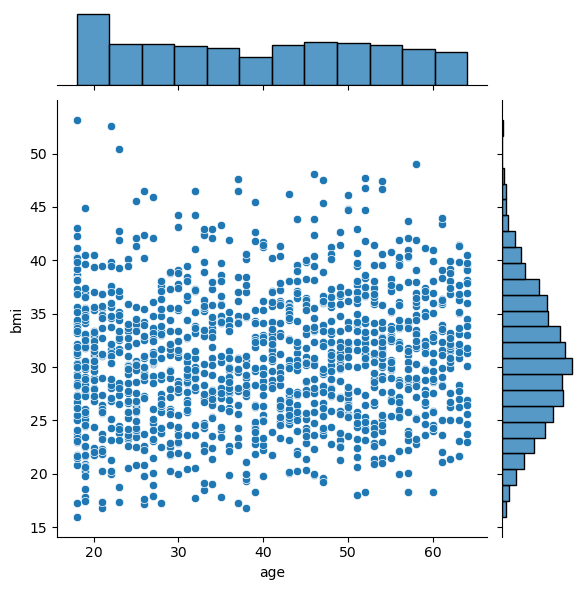

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Create the joint plot
sns.jointplot(x='age', y='bmi', data=df, kind='scatter')
plt.show()


In [12]:
# Calculate the correlation coefficient
correlation = df['age'].corr(df['bmi'])
print(f"Correlation coefficient: {correlation:.2f}")


Correlation coefficient: 0.11


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path, index_col=0)

# Check and convert 'insurance_claim' to numeric if necessary
# Assuming 'insurance_claim' could be 'yes' or 'no', map to 1 and 0
if df['insurance_claim'].dtype == 'object':
    df['insurance_claim'] = df['insurance_claim'].map({'yes': 1, 'no': 0})

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
X = df_dummies.drop(columns='insurance_claim')
y = df_dummies['insurance_claim']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # max_iter increased to ensure convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy (proportion of correctly predicted claim indicators)
accuracy = accuracy_score(y_test, y_pred)
print(f"Proportion of claim indicators correctly predicted: {accuracy * 100:.2f}%")


Proportion of claim indicators correctly predicted: 100.00%


In [16]:
import pandas as pd
import statsmodels.api as sm

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Convert 'insurance_claim' to numeric if necessary
if df['insurance_claim'].dtype == 'object':
    df['insurance_claim'] = df['insurance_claim'].map({'yes': 1, 'no': 0})

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
X = df_dummies.drop(columns='insurance_claim')
y = df_dummies['insurance_claim']

# Add constant to the feature matrix
X = sm.add_constant(X)

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary
print(result.summary())


c:\Users\Buma\AppData\Local\miniconda3\envs\Datascience\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\Buma\AppData\Local\miniconda3\envs\Datascience\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

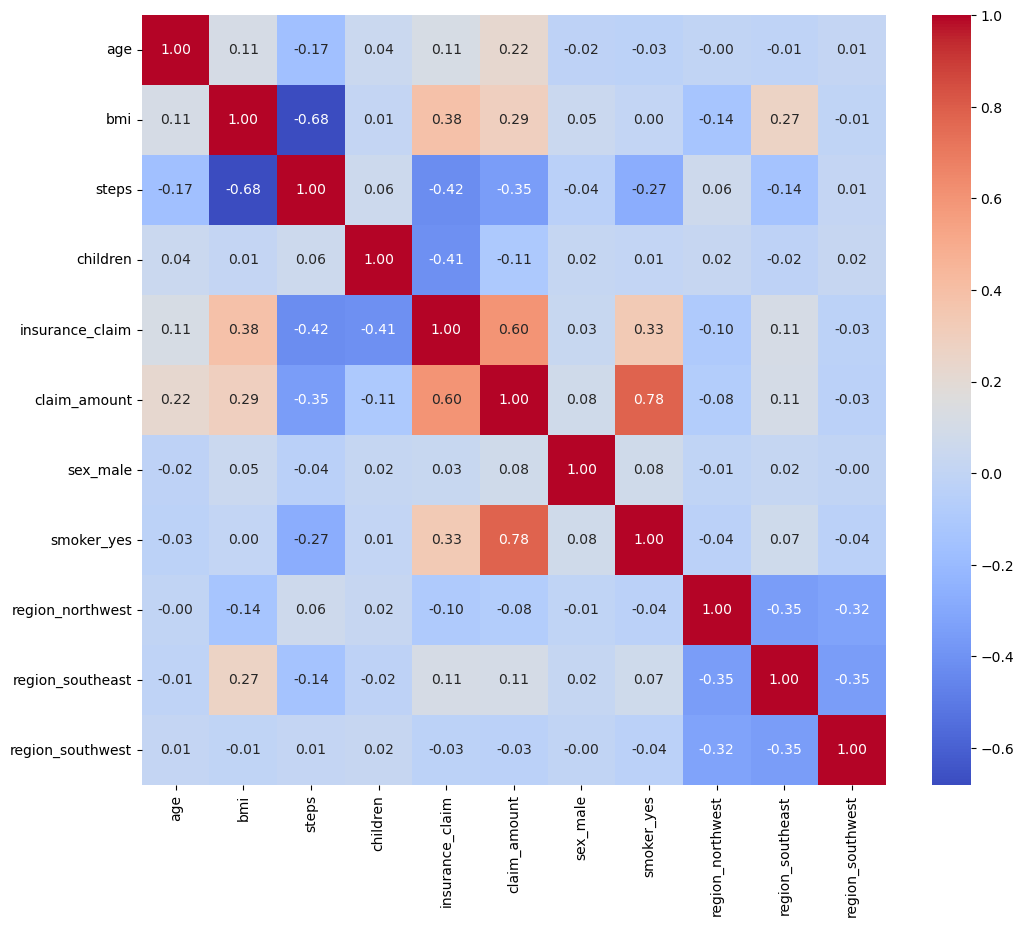

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for multicollinearity
corr_matrix = df_dummies.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [18]:
print(X.columns[X.columns.duplicated()])


Index([], dtype='object')


In [19]:
X = X.loc[:, ~X.columns.duplicated()]


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
# Add constant to the feature matrix
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary
print(result.summary())


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path, index_col=0)

# Convert 'insurance_claim' to numeric if necessary
if df['insurance_claim'].dtype == 'object':
    df['insurance_claim'] = df['insurance_claim'].map({'yes': 1, 'no': 0})

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
X = df_dummies.drop(columns='insurance_claim')
y = df_dummies['insurance_claim']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")


Confusion Matrix:
[[181   0]
 [  0 261]]
False Negatives: 0
False Positives: 0


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the file path
file_path = r'C:\Users\Buma\Desktop\Alx\claims_data.csv'

# Load the dataset
df = pd.read_csv(file_path, index_col=0)

# Convert 'insurance_claim' to numeric if necessary
if df['insurance_claim'].dtype == 'object':
    df['insurance_claim'] = df['insurance_claim'].map({'yes': 1, 'no': 0})

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
X = df_dummies.drop(columns='insurance_claim')
y = df_dummies['insurance_claim']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit SVM models with different kernels
svm_radial = SVC(kernel='rbf', random_state=101)
svm_sigmoid = SVC(kernel='sigmoid', random_state=101)
svm_linear = SVC(kernel='linear', random_state=101)

# Train the models
svm_radial.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred_radial = svm_radial.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)

# Compute accuracies
accuracy_radial = accuracy_score(y_test, y_pred_radial)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Accuracy (Radial Kernel): {accuracy_radial:.4f}")
print(f"Accuracy (Sigmoid Kernel): {accuracy_sigmoid:.4f}")
print(f"Accuracy (Linear Kernel): {accuracy_linear:.4f}")


Accuracy (Radial Kernel): 0.9955
Accuracy (Sigmoid Kernel): 0.9819
Accuracy (Linear Kernel): 1.0000
